In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 9s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
labels = ["airplane", "automobile", "bird",
          "cat", "deer", "dog", "frog",
          "horse", "ship", "truck"]

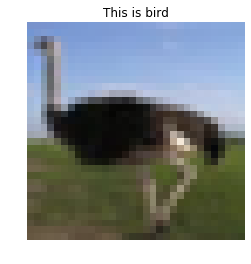

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.title("This is " + labels[y_train[c][0]])
plt.axis("off")
plt.imshow(x_train[c])

In [0]:
# 圖片處理: /255
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [6]:
# 答案處理: One-Hot
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("before:", y_train[0])
print("after:", y_train_cat[0])

before: [6]
after: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
cnn = Sequential()
# 3 * 3 * 3(一個過濾器) * 64 + 64(bias) = 1792
cnn.add(Conv2D(64, (3, 3), 
               padding="same",
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
# 3 * 3 * 64(一個過濾器) * 128 + 128(bias) = 73856
cnn.add(Conv2D(128, (3, 3), 
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(512, (3, 3), 
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 512)        

In [0]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [14]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=5,
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
 - 7s - loss: 1.8149 - acc: 0.3189 - val_loss: 1.3745 - val_acc: 0.4900
Epoch 2/5
 - 6s - loss: 1.2696 - acc: 0.5427 - val_loss: 1.1002 - val_acc: 0.6082
Epoch 3/5
 - 6s - loss: 1.0038 - acc: 0.6469 - val_loss: 0.8783 - val_acc: 0.6942
Epoch 4/5
 - 6s - loss: 0.8197 - acc: 0.7144 - val_loss: 0.7785 - val_acc: 0.7280
Epoch 5/5
 - 6s - loss: 0.6761 - acc: 0.7646 - val_loss: 0.7245 - val_acc: 0.7546


In [16]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 1s 127us/step


[0.7727147126197815, 0.7391]

In [20]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = cnn.predict_classes(x_test_norm)

c = [(str(l) + "(預測)") for l in labels]
i = [(str(l) + "(正確)") for l in labels]
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),783,11,31,32,16,4,4,22,62,35
automobile(正確),13,839,5,14,2,5,9,9,15,89
bird(正確),63,4,564,94,100,74,46,37,10,8
cat(正確),12,5,43,609,48,172,50,48,2,11
deer(正確),20,1,45,96,656,27,33,112,10,0
dog(正確),5,2,25,195,41,653,14,61,1,3
frog(正確),5,3,30,81,48,21,794,9,5,4
horse(正確),8,0,12,31,37,59,4,841,2,6
ship(正確),54,32,7,36,6,10,6,5,820,24
truck(正確),17,58,2,29,4,11,5,27,15,832


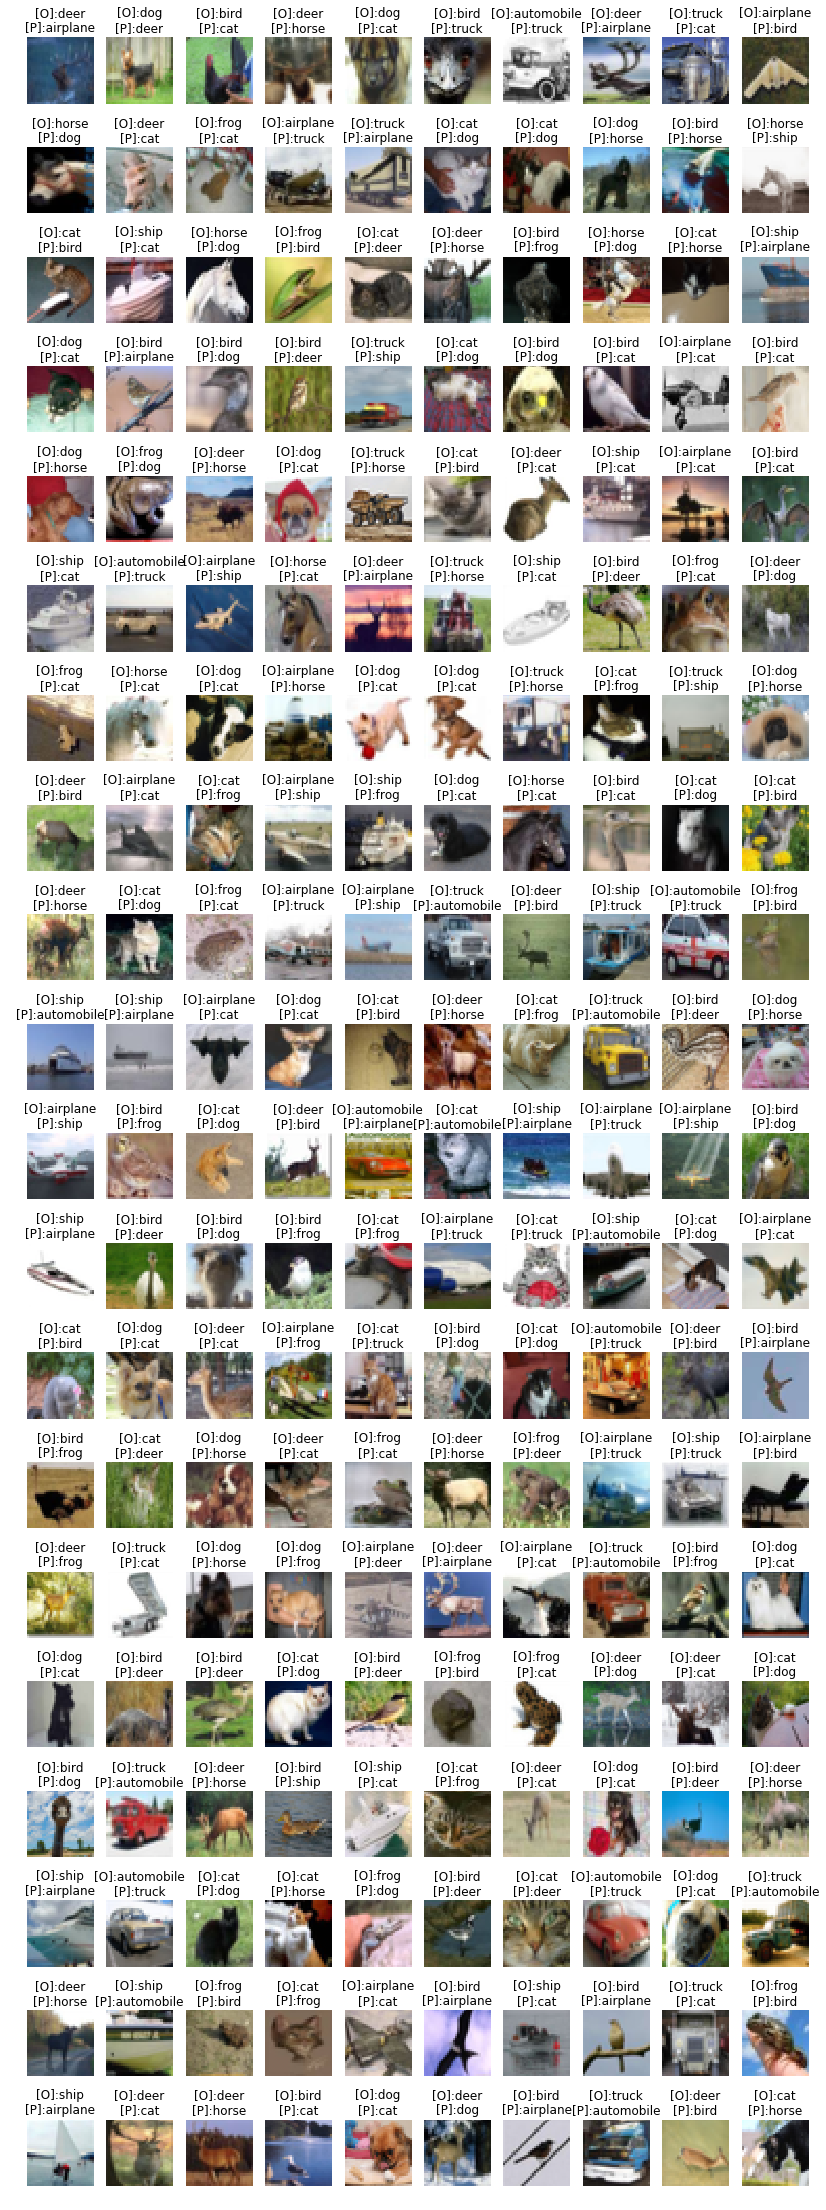

In [31]:
import numpy as np
# 要reshape, 10000, 1 不等於 10000
y_test_re = y_test.reshape(10000)
idx = np.nonzero(pre != y_test_re)[0][:200]
false_img = x_test[idx]
false_answer = y_test_re[idx]
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = "[O]:" + labels[false_answer[i]] + "\n[P]:" + labels[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

In [0]:
cnn.save("cnn.h5")

In [34]:
from google.colab import drive
drive.mount('/gdrive')
# 保存在雲端硬碟
# cnn.save("/gdrive/My Drive/cnn.h5")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
